In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cwd_split = os.getcwd().split('/')

if cwd_split[-1] == "ai":
    higher_level_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    os.chdir(higher_level_dir)
    print(f"changed to {higher_level_dir}")
elif cwd_split[-2] == "ai":
    higher_level_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
    os.chdir(higher_level_dir)
    print(f"changed to {higher_level_dir}")

print(os.getcwd())


changed to /home/mrks/linux-Documents/efficientIO
/home/mrks/linux-Documents/efficientIO


In [9]:
from datetime import datetime, timedelta, time
import pandas as pd

from ai.utils.http_utils import fetch_data_from_http, append_data_to_dataframe_http
import os

projects = [
'638f6103-9d59-4c70-88ad-30aab513c47d',
'c31751ab-0ec6-434d-bdd4-ec062325205f',
'562a358b-9af8-4176-9baa-7b1562d8e524',
'4d0c34f6-242f-4ce1-92bd-2a764b070941',
'ef351b6e-8cb7-43ed-9945-e3881a3cf228',
'0bd2836e-ee9c-4130-8903-5450f0f5540d' # Anker Bahnhofcity
]


v = 'prgEM.lr_RealPower_Grid'
# opening times (read from project settings)
# closing times (read from project settings)
# mocked
t_open = time(3,0)
t_closing = time(20,00)

# “bake window” timeframe (numeric input field, in minutes)
bake_window = 180

In [10]:
def get_load_periods(df: pd.DataFrame, th: float):
    backing_periods = []
    start = None

    for index, row in df.iterrows():
        if row["Rolling Mean"] > th:
            if start is None:
                start = row.name
        elif not start is None:
            backing_periods.append((start, row.name))
            start = None
    return backing_periods

In [11]:
import numpy as np
from sklearn.cluster import KMeans

def get_tresholds(df, factor):
    # Generate some example data
    data = df["Rolling Mean"].dropna().values.reshape(-1,1)
    # Define the number of clusters (in this case, 2)
    num_clusters = 3

    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)

    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_

    # Sort the centroids
    centroids_sorted = np.sort(centroids, axis=0)

    # The threshold will be the midpoint between the two centroids
    threshold = [(centroids_sorted[0] + centroids_sorted[1]) / factor,
                (centroids_sorted[1] + centroids_sorted[2]) / factor,
                (centroids_sorted[1] + centroids_sorted[2]) / (factor)]


    print("Threshold:", threshold)
    return threshold


In [12]:
def plot_backing_monitoring(operation_start, operation_stop, load_periods, ths):
    import matplotlib.pyplot as plt

    # Plot the DataFrame
    plt.figure(figsize=(10, 6))

    # Plot DataFrame as a scatter plot
    plt.plot(df, label='DataFrame')

    # Plot the float value as a horizontal line
    plt.axhline(y=operating_mean, color='g', linestyle='-')
    plt.axhline(y=operating_mean_roll, color='r', linestyle='--')

    plt.axhline(y=closed_hours_max, color='g', linestyle='-')
    plt.axhline(y=closed_hours_mean, color='r', linestyle='-')
    plt.axhline(y=th1, color='g', linestyle='--')

    plt.axhline(ths[0], color='g', linestyle='--')
    plt.axhline(ths[1], color='g', linestyle='-')





    plt.axvspan(operation_start, operation_stop, color='lightgray')

    for item in load_periods:
        plt.axvspan(item[0], item[1], color='yellow')



    # Show the plot
    plt.grid(False)
    plt.show()

In [13]:
def analyze_load_monitoring(ths, ref):
    plt.figure(figsize=(10, 10))

    plt.subplot(411)
    df["Rolling Mean"].plot()
    plt.axhline(ths[0], color='g', linestyle='--')
    plt.axhline(ths[1], color='g', linestyle='-')
    plt.axhline(ref, color='r', linestyle='--')

    
    plt.subplot(412)
    plt.plot(np.gradient(df["Rolling Mean"].values))

    plt.subplot(413)
    st = np.sort(df["Rolling Mean"].values)
    st_grad = np.gradient(st)
    plt.plot(st)
    plt.plot(st_grad*10)

    plt.subplot(414)
    _ = plt.hist(st, bins=30)  # arguments are passed to np.histogram
    plt.show()

In [14]:
import pytz
def dt_to_ts(dt: datetime):
    return int(dt.timestamp())

def datetime_add_timezone(standard_datetime: datetime):
    # Convert to datetime64[ns, CET]
    standard_datetime = standard_datetime - timedelta(hours=2)
    cet_timezone = pytz.timezone('CET')
    datetime_cet = pd.to_datetime(standard_datetime, utc=True).tz_convert(cet_timezone)
    return datetime_cet

ANAYLISIS FOR PROJECT: 638f6103-9d59-4c70-88ad-30aab513c47d


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.79916576]), array([9.72028295]), array([9.72028295])]
ANAYLISIS FOR PROJECT: c31751ab-0ec6-434d-bdd4-ec062325205f


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.51181145]), array([8.54500665]), array([8.54500665])]
ANAYLISIS FOR PROJECT: 562a358b-9af8-4176-9baa-7b1562d8e524


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([21.81124781]), array([31.4479511]), array([31.4479511])]
ANAYLISIS FOR PROJECT: 4d0c34f6-242f-4ce1-92bd-2a764b070941


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.56709443]), array([9.70719382]), array([9.70719382])]
ANAYLISIS FOR PROJECT: ef351b6e-8cb7-43ed-9945-e3881a3cf228


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.06213033]), array([7.72513513]), array([7.72513513])]
ANAYLISIS FOR PROJECT: 0bd2836e-ee9c-4130-8903-5450f0f5540d


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: [array([4.933604]), array([10.10958055]), array([10.10958055])]


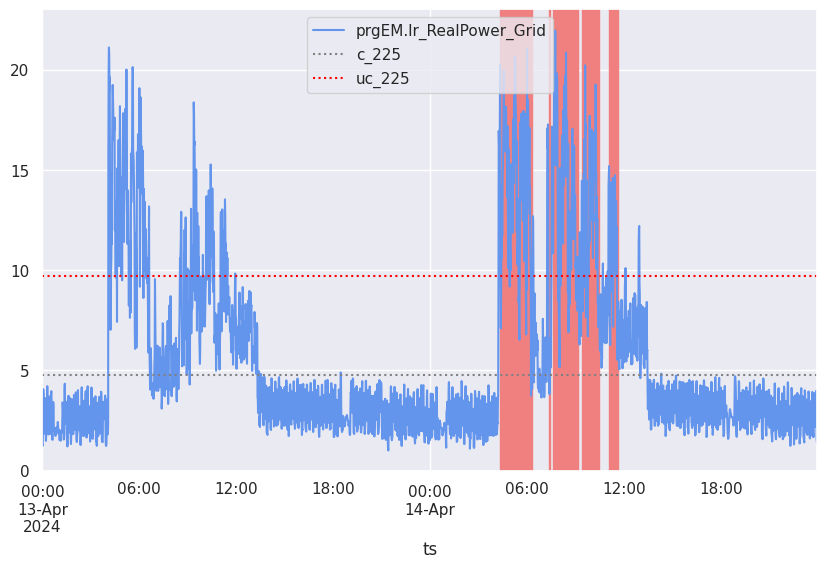

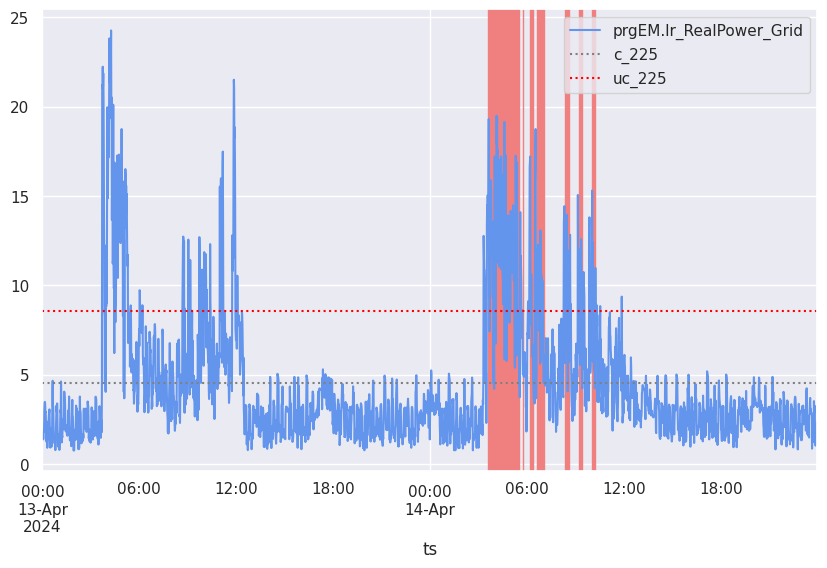

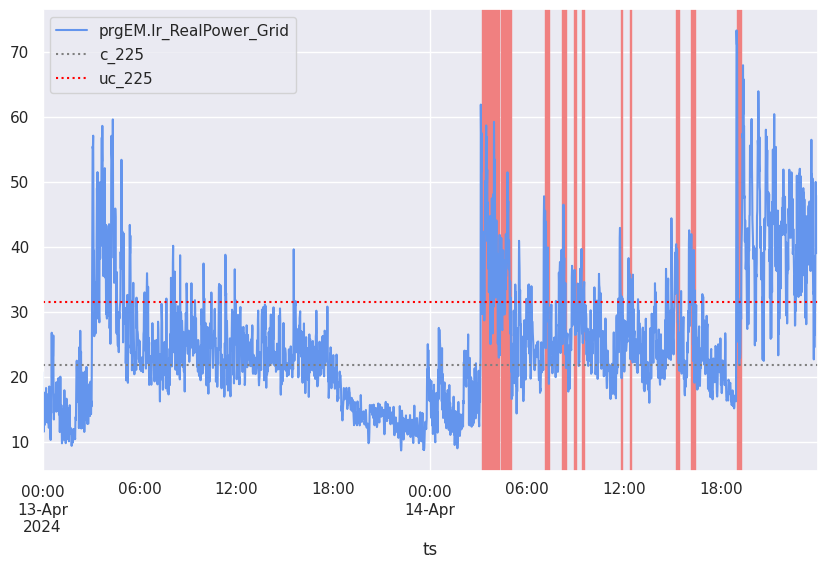

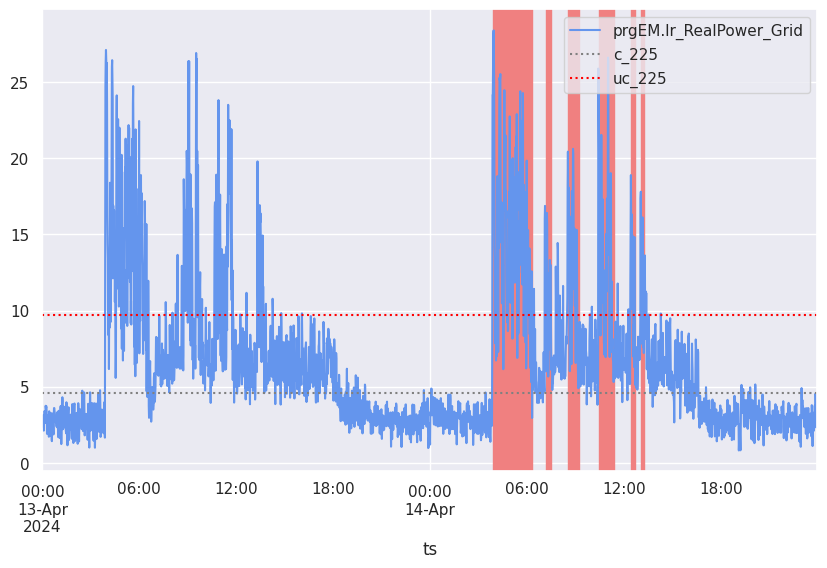

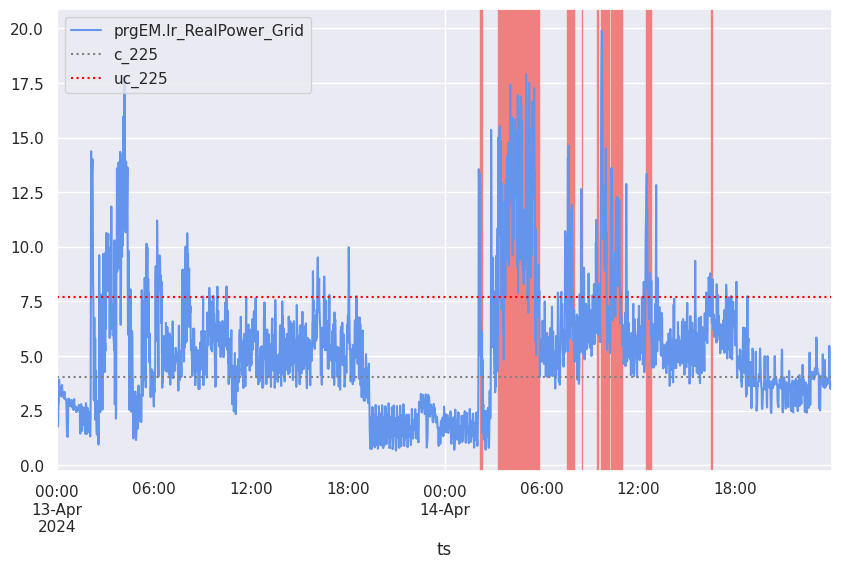

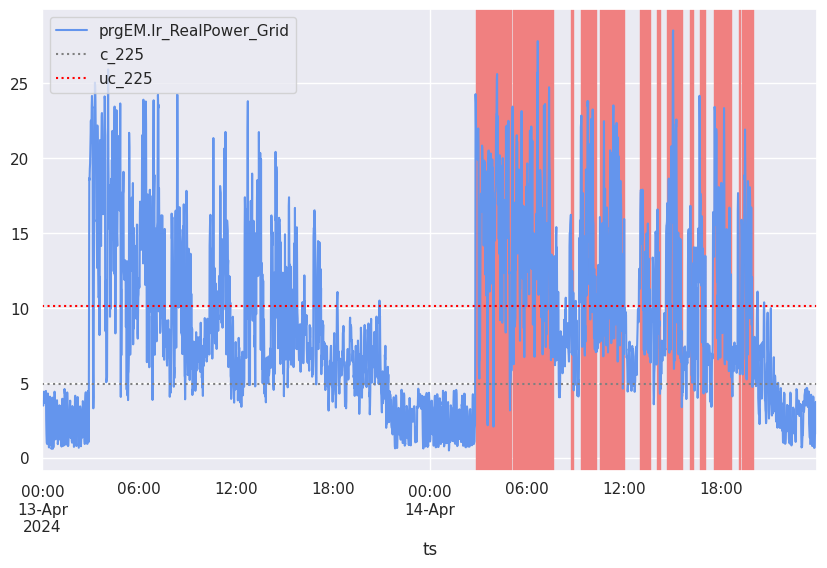

In [17]:

import pytz
import seaborn as sns
sns.set_style("darkgrid")

def dt_to_ts(dt: datetime):
    return int(dt.timestamp())

def datetime_add_timezone(standard_datetime: datetime):
    # Convert to datetime64[ns, CET]
    standard_datetime = standard_datetime - timedelta(hours=2)
    cet_timezone = pytz.timezone('CET')
    datetime_cet = pd.to_datetime(standard_datetime, utc=True).tz_convert(cet_timezone)
    return datetime_cet

for project_id in projects:
    v = 'prgEM.lr_RealPower_Grid'

    print(f'ANAYLISIS FOR PROJECT: {project_id}')

    analyze_day_offset = 1
    reference_time = [22,23]
    
    analyze_day = datetime.today()-timedelta(days=analyze_day_offset)
    baseline_day = datetime.today()-timedelta(days=analyze_day_offset+1)


    start_dt = datetime_add_timezone(baseline_day)
    end_dt = datetime_add_timezone(analyze_day)

    #t_ref_start =  datetime_add_timezone(datetime.combine(start_dt, time(reference_time[0],0)))
    #t_ref_end =  datetime_add_timezone(datetime.combine(start_dt, time(reference_time[1],0)))


    # define analysis period
    start_dt = start_dt.replace(hour = 0, minute = 0, second= 0, microsecond = 0)
    end_dt = end_dt.replace(hour = 23, minute = 59, second= 59, microsecond = 0)

    start_ts = int(start_dt.timestamp())
    end_ts = int(end_dt.timestamp())


    df = pd.DataFrame()

    data = fetch_data_from_http(v, project_id, start_ts, end_ts, "1m")
    df = append_data_to_dataframe_http(df, data, v)
    df = df.set_index("ts")

    df['Rolling Mean'] = df[v].rolling(window=11, step=5, center=False).mean()
    df['Rolling Mean'] = df['Rolling Mean'].interpolate('linear')

    df_base = df[df.index.day == start_dt.day]
    df_analyse = df[df.index.day == end_dt.day]

    ths_225 = get_tresholds(df_analyse, 2.25)

    load_periods = get_load_periods(df_analyse, ths_225[1])

    
    plt.figure(figsize=(10, 6))

    df[v].plot(color="cornflowerblue")
    #df["Rolling Mean"].plot()
    

    for item in load_periods:
        plt.axvspan(item[0], item[1], color='lightcoral')

        
    #plt.axvspan(t_ref_start, t_ref_end, color='yellow')

    plt.axhline(ths_225[0], color='gray', linestyle=':', label="c_225")
    plt.axhline(ths_225[1], color='red', linestyle=':', label="uc_225")


    #plt.axhline(reference_max_v, color='r', linestyle='-', label="ref_v")
    plt.legend()
    
    continue






/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.564285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([4.12801677]), array([9.70371096]), array([9.70371096])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.4314285714285715' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([4.69806911]), array([9.39549879]), array([9.39549879])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '45.27428571428572' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([18.65520861]), array([29.11995833]), array([29.11995833])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.7314285714285718' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([4.84615095]), array([9.4904974]), array([9.4904974])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.874285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([4.40710417]), array([7.44791593]), array([7.44791593])]


/home/mrks/miniconda3/envs/py3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_95758/2402710655.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["new"] = 0
/tmp/ipykernel_95758/2402710655.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.692857142857143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analyse.loc[index, "new"] = val


Threshold: [array([5.38975744]), array([10.41293609]), array([10.41293609])]


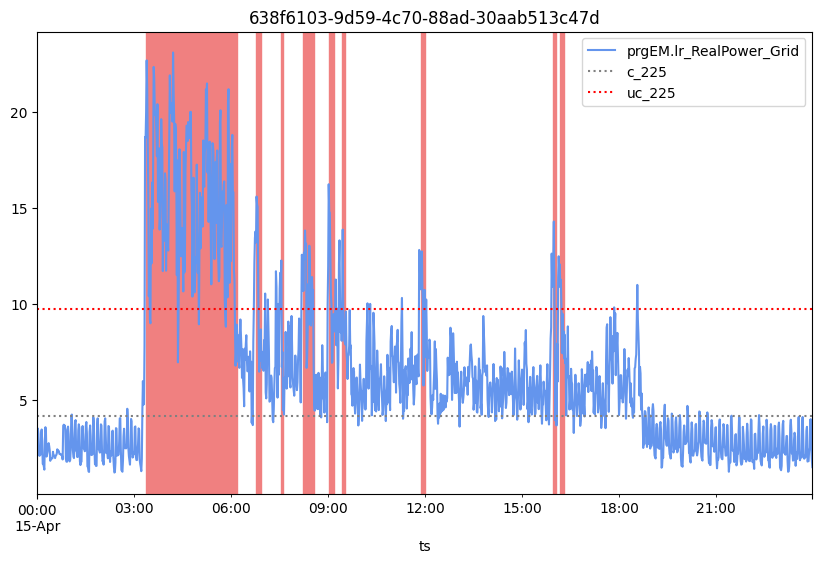

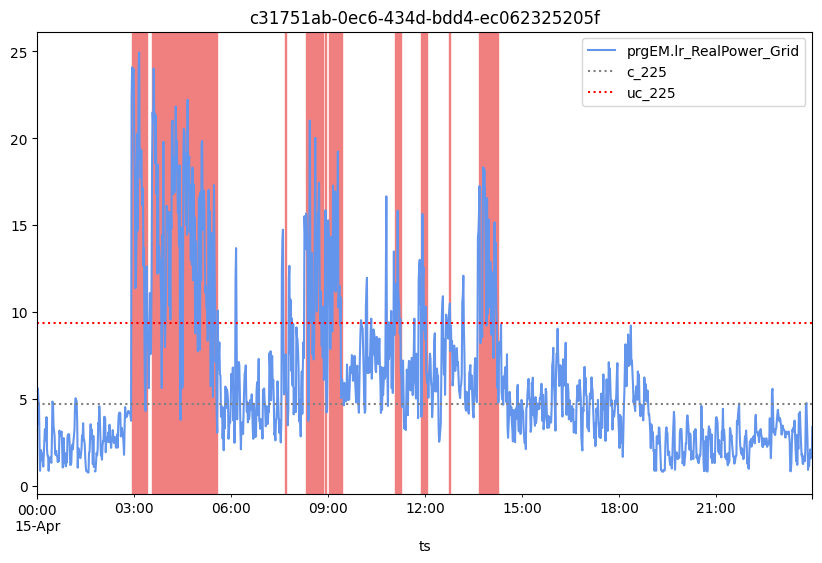

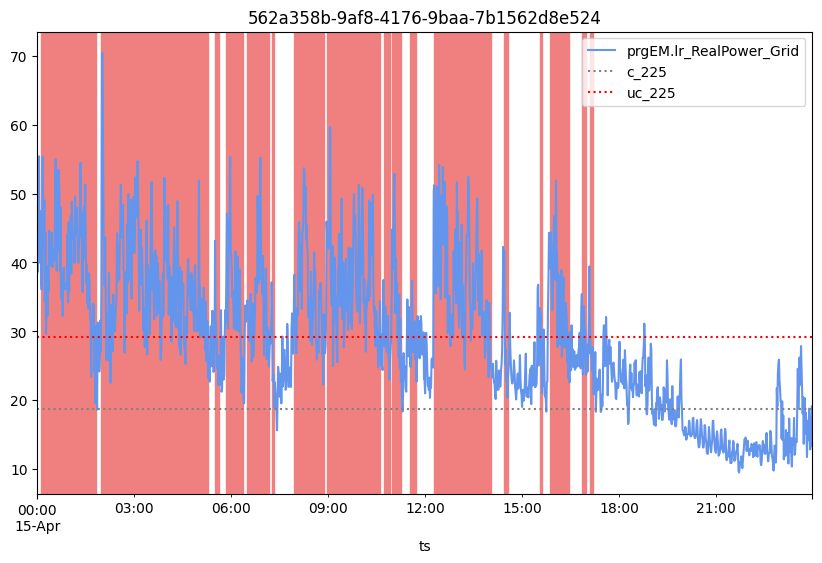

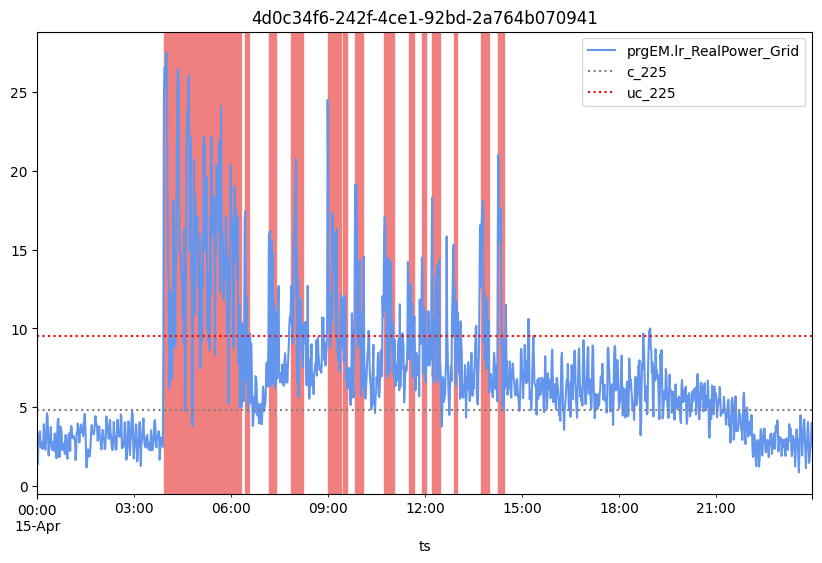

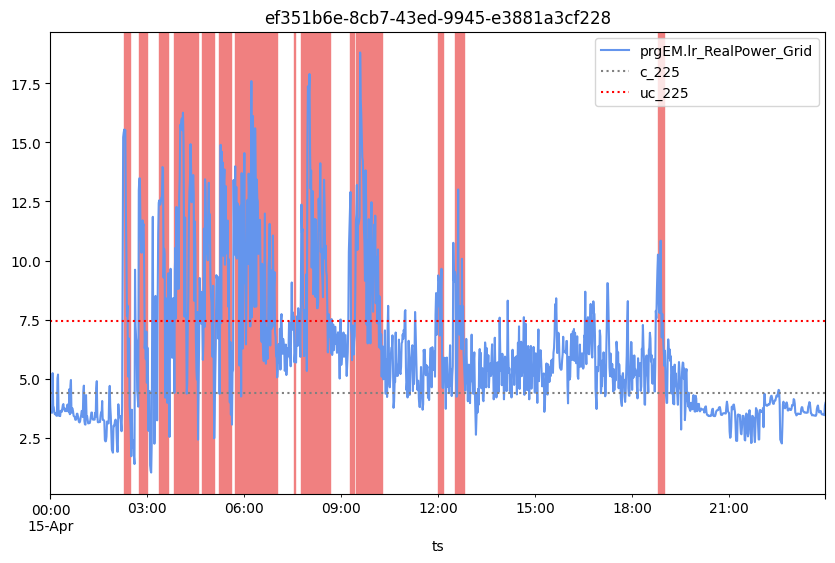

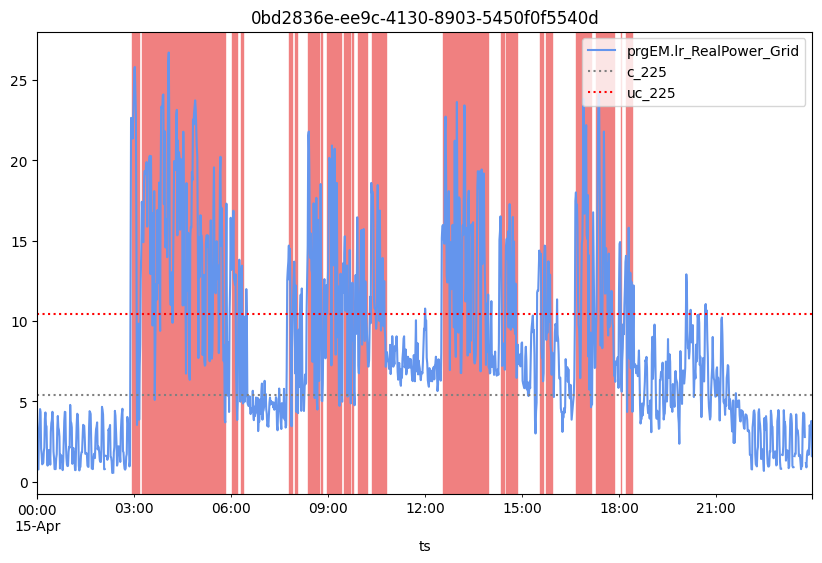

In [82]:
from datetime import datetime, timedelta

# project settings

projects = [
    '638f6103-9d59-4c70-88ad-30aab513c47d',
    'c31751ab-0ec6-434d-bdd4-ec062325205f',
    '562a358b-9af8-4176-9baa-7b1562d8e524',
    '4d0c34f6-242f-4ce1-92bd-2a764b070941',
    'ef351b6e-8cb7-43ed-9945-e3881a3cf228',
    '0bd2836e-ee9c-4130-8903-5450f0f5540d' # Anker Bahnhofcity
]

v = 'prgEM.lr_RealPower_Grid'



analyze_day_offset = 1

analyze_day = datetime.today()-timedelta(days=analyze_day_offset)
baseline_day = datetime.today()-timedelta(days=analyze_day_offset+1)

start_dt = datetime_add_timezone(baseline_day)
end_dt = datetime_add_timezone(analyze_day)

# define analysis period
start_dt = start_dt.replace(hour = 0, minute = 0, second= 0, microsecond = 0)
end_dt = end_dt.replace(hour = 23, minute = 59, second= 59, microsecond = 0)

start_ts = int(start_dt.timestamp())
end_ts = int(end_dt.timestamp())

for project_id in projects:
    df = pd.DataFrame()

    data = fetch_data_from_http(v, project_id, start_ts, end_ts, "1m")
    df = append_data_to_dataframe_http(df, data, v)
    df = df.set_index("ts")

    df['Rolling Mean'] = df[v].rolling(window=11, step=5, center=False).mean()
    df['Rolling Mean'] = df['Rolling Mean'].interpolate('linear')

    df_base = df[df.index.day == start_dt.day]
    df_analyse = df[df.index.day == end_dt.day]

    ths_225 = get_tresholds(df_analyse, 2.25)

    # state dict
    state = {"ths": ths_225[1],
            "load_start" : None}

    load_periods = []

    df_analyse["new"] = 0
    window = 7
    # trigger each minute = loop
    for i, (index, row) in enumerate(df_analyse.iterrows()):
        # simulates cronjob
        if i < window-1:
            continue
        # rolling mean
        val = df_analyse.iloc[i-(window-1):i+1][v].mean()
        df_analyse.loc[index, "new"] = val
        
        if val > state["ths"]:
            if state["load_start"] is None:

                state["load_start"] = row.name
        elif not state["load_start"] is None:
            load_periods.append((state["load_start"], row.name))
            state["load_start"] = None


    plt.figure(figsize=(10, 6))

    df_analyse[v].plot(color="cornflowerblue")
    #df_analyse["new"].plot()
    


    for item in load_periods:
        plt.axvspan(item[0], item[1], color='lightcoral')

        
    #plt.axvspan(t_ref_start, t_ref_end, color='yellow')

    plt.axhline(ths_225[0], color='gray', linestyle=':', label="c_225")
    plt.axhline(ths_225[1], color='red', linestyle=':', label="uc_225")


    #plt.axhline(reference_max_v, color='r', linestyle='-', label="ref_v")
    plt.legend()
    plt.title(project_id)
    plt.plot()
    
    



In [18]:
import pandas as pd

aa = {"a": [1,2,3,4,5,5,7]}


df = pd.DataFrame.from_dict(aa)
df = df.rolling(window=7, step=1, center=False).mean().interpolate("linear")
df

,a
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,3.857143


AttributeError: 'Series' object has no attribute 'value'

In [24]:
from datetime import datetime

datetime.now()

datetime.datetime(2024, 4, 19, 10, 4, 37, 409573)